## 📖 웹 크롤링이란?

웹 크롤링은 **웹 페이지를 자유롭게 돌아다니며 필요한 데이터를  자동으로 수집**하는 기술입니다.

## 🐍 requests 라이브러리

`requests`는 **HTTP 요청을 쉽게 보내고 응답 받을수 있는** 파이썬 라이브러리입니다.


### 📦 라이브러리 설치

```python
# Colab에서는 이미 설치되어 있음
!pip install requests
```

### 🌐 기본 사용법

**httpbin.org**는 **HTTP 테스트를 위한 무료 서비스**입니다.

In [ ]:
import requests

# 웹 페이지 요청
response = requests.get('https://httpbin.org/html')

In [ ]:
# 응답 확인
print(response.status_code)  # HTTP 상태 코드

200


In [ ]:
print(response.text)         # HTML 내용 (문자열로 디코딩된 텍스트)

<!DOCTYPE html>
<html>
  <head>
  </head>
  <body>
      <h1>Herman Melville - Moby-Dick</h1>

      <div>
        <p>
          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to ringbolts by the foremast; being now almost incessantly invoked by the headsmen, and harpooneers, and bowsmen to do some little job for them; altering, or repairing, or new shaping their various weapons and boat furniture. Often he would be surrounded by an eager circle, all waiting to be served; holding boat-spades, pike-heads, harpoons, and lances, and jealously watching his every sooty movement, as he toiled. Nevertheless, this old man's was a patient hammer wielded by a patient arm. No murmur

In [ ]:
print(response.content)      # HTML 내용 (바이너리 데이터) - 권장

b"<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to ringbolts by the foremast; being now almost incessantly invoked by the headsmen, and harpooneers, and bowsmen to do some little job for them; altering, or repairing, or new shaping their various weapons and boat furniture. Often he would be surrounded by an eager circle, all waiting to be served; holding boat-spades, pike-heads, harpoons, and lances, and jealously watching his every sooty movement, as he toiled. Nevertheless, this old man's was a patient hammer wielded by a patient arm

## 📊 HTTP 상태 코드

HTTP 상태 코드는 **서버의 응답 상태**를 나타내는 3자리 숫자입니다.

### 🎯 **상태 코드 분류**

| 코드 범위 | 의미 | 설명 |
| --- | --- | --- |
| **2xx** | ✅ **성공** | 요청이 성공적으로 처리됨 |
| **4xx** | ❌ **클라이언트 오류** | 요청에 문제가 있음 |
| **5xx** | ⚠️ **서버 오류** | 서버에서 문제가 발생함 |


### 📋 **주요 상태 코드**

| 코드 | 의미 | 설명 | 대응 방법 |
| --- | --- | --- | --- |
| **200** | ✅ 성공 | 요청이 성공적으로 처리됨 | 정상적으로 데이터 처리 |
| **403** | 🚫 접근 금지 | 서버가 요청을 거부함 | **헤더 변경** 필요 |
|  | ⚠️ 허용되지 않음 | 서버가 Accept 헤더를 처리할 수 없음 | Accept 헤더 추가 |
| **404** | 🔍 찾을 수 없음 | 페이지가 존재하지 않음 | URL 확인 후 재시도 |
| **500** | ⚠️ 서버 오류 | 서버 내부에서 오류 발생 | 시간을 두고 재시도 |

### 🕵️ **403, 406 오류와 헤더 위장**

#### 오류가 발생하는 이유

- 웹사이트가 **크롤러(봇)를 감지**해서 접근을 차단
- `User-Agent`를 보고 **"이것은 봇이다!"** 판단

#### 해결책: 브라우저로 위장하기

In [ ]:
# ❌ 기본 requests (봇으로 인식됨)
response = requests.get('https://www.melon.com/chart/index.htm')
print(response.status_code)


406


In [ ]:
# ✅ 브라우저로 위장
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get('https://www.melon.com/chart/index.htm', headers=headers)
print(response.status_code)


200


## HTML 추출


### 🔍 `response.text` vs `response.content`

| 구분 | `response.text` | `response.content` |
| --- | --- | --- |
| **데이터 타입** | 문자열 (str) | 바이트 (bytes) |
| **처리 과정** | 자동 디코딩된 텍스트 | 원본 바이너리 데이터 |
| **안정성** | 인코딩 오류 가능 | ⭐️ 원본 그대로 (안정적) |
| **가독성** | 인간이 읽기 쉬움 | 바이트 형태로 출력 |

In [ ]:
response = requests.get('https://httpbin.org/html')

In [ ]:
# text: 자동 디코딩된 HTML (인간이 읽을 수 있는 형태)
print(type(response.text))
print("=" * 30)
response.text    # 텍스트 디코딩하여 HTML 텍스트 출력 (인간이 읽을 수 있는 형태)


<class 'str'>


'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="4022717807957185"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png

In [ ]:
print(type(response.content))
print("=" * 30)
print(response.content)  # ⭐️ 원본 바이너리 데이터 (더 안정적)


<class 'bytes'>
b'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>\xeb\xa9\x9c\xeb\xa1\xa0\xec\xb0\xa8\xed\x8a\xb8>TOP100>\xeb\xa9\x9c\xeb\xa1\xa0</title>\r\n\t<meta name="keywords" content="\xec\x9d\x8c\xec\x95\x85\xec\x84\x9c\xeb\xb9\x84\xec\x8a\xa4, \xeb\xa9\x9c\xeb\xa1\xa0\xec\xb0\xa8\xed\x8a\xb8, \xeb\xa9\x9c\xeb\xa1\xa0TOP100, \xec\xb5\x9c\xec\x8b\xa0\xec\x9d\x8c\xec\x95\x85, \xec\x9d\xb8\xea\xb8\xb0\xea\xb0\x80\xec\x9a\x94, \xeb\xae\xa4\xec\xa7\x81\xeb\xb9\x84\xeb\x94\x94\xec\x98\xa4, \xec\x95\xa8\xeb\xb2\x94, \xed\x94\x8c\xeb\xa0\x88\xec\x9d\xb4\xec\x96\xb4, \xec\x8a\xa4\xed\x8a\xb8\xeb\xa6\xac\xeb\xb0\x8d, \xeb\x8b\xa4\xec\x9a\xb4\xeb\xa1\x9c\xeb\x93\x9c, \xec\x95\x84\xed\x8b\xb

In [ ]:
# 직접 디코딩: 가장 보편적인 인코딩 방식 = 'utf-8'
response.content.decode('utf-8')  # resp.text 과 같은 결과


'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="4022717807957185"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png

# 🍲 BeautifulSoup으로 HTML 파싱하기

## 📚 BeautifulSoup이란?

**BeautifulSoup**은 HTML 문서를 **파이썬 객체**로 바꿔서 원하는 데이터를 **쉽게 선택하고 추출**할 수 있게 해주는 라이브러리입니다.

- HTML 구조 → 파이썬 트리로 파싱

### 📦 라이브러리 설치

```python
# Colab에서는 이미 설치되어 있음
!pip install beautifulsoup4
!pip install lxml  # HTML 파서 (더 빠름)

# import
import requests
from bs4 import BeautifulSoup
```

## 🎯 BeautifulSoup 기본 사용법

- 원하는 태그/클래스를 `select`나 `find`로 선택
- `.text`, `.get('속성명')`을 사용해 텍스트/링크 추출

### 📄 HTML 파싱 기본 구조

In [ ]:
import requests
from bs4 import BeautifulSoup


In [ ]:
# 1단계: 웹 페이지 요청
response = requests.get('https://httpbin.org/html')


In [ ]:
# 2단계: BeautifulSoup 객체 생성
soup = BeautifulSoup(response.content, 'lxml')  # lxml 파서 사용 (권장)


In [ ]:
# 3단계: 원하는 데이터 추출# CSS Selector_onetitle
# find() 메서드 사용
title = soup.find('h1').text  # 첫번쨰 h1 태그의 텍스트
title.strip()


'Herman Melville - Moby-Dick'

In [ ]:
# select() 메서드 사용 (CSS Selector)
contents = soup.select('div p')  # 리스트 반환
contents[0].text.strip()  # 첫 번째 p태그의 텍스트 추출

"Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to ringbolts by the foremast; being now almost incessantly invoked by the headsmen, and harpooneers, and bowsmen to do some little job for them; altering, or repairing, or new shaping their various weapons and boat furniture. Often he would be surrounded by an eager circle, all waiting to be served; holding boat-spades, pike-heads, harpoons, and lances, and jealously watching his every sooty movement, as he toiled. Nevertheless, this old man's was a patient hammer wielded by a patient arm. No murmur, no impatience, no petulance did come from him. Silent, slow, and solemn; bowing over still further his chronically broken back

### 🔍 주요 메서드

| 메서드 | 용도 | 반환값 | 예시 |
| --- | --- | --- | --- |
| `find()` | 첫 번째 요소 찾기 | 단일 요소 | `soup.find('h1')` |
| `find_all()` | 모든 요소 찾기 | 리스트 | `soup.find_all('a')` |
| `select()` | CSS Selector로 찾기 | 리스트 | `soup.select('.news-title')` |
| `select_one()` | CSS Selector로 첫 번째 찾기 | 단일 요소 | `soup.select_one('#main')` |

## 💡 BeautifulSoup 핵심 팁

### 🔍 요소 찾기 방법 비교

```python
# 1. find() - 첫 번째 요소만
first_title = soup.find('h1')
first_title = soup.find('h1', class_='title')  # 클래스 지정

# 2. find_all() - 모든 요소
all_links = soup.find_all('a')
news_links = soup.find_all('a', class_='news-link')

# 3. CSS Selector - 가장 유연함
titles = soup.select('h1.title')           # 클래스 선택
titles = soup.select('#main h1')           # ID 하위 요소
titles = soup.select('div > h1')           # 직계 자식
titles = soup.select('a[href*="news"]')    # 속성 포함
```

### 🟡 단계별 접근

```python
# 특정 태그 내부 요소 찾기
# 1단계: 부모 태그들 먼저 가져오기
parent_tags = soup.select('strong.tit-g a')

# 2단계: 각 부모 태그 내부의 하위 요소 찾기
for parent_tag in parent_tags:
    # 현재 태그 내부의 span들 찾기
    span_tags = parent_tag.select('span')      # CSS Selector 사용
    # 또는
    span_tags = parent_tag.find_all('span')    # find_all() 사용
    
    # 각 span 태그 처리
    for span in span_tags:
        print(span.text)
```

### 📝 텍스트와 속성 추출

```python
# 텍스트 추출
title_text = tag.text              # 모든 하위 텍스트
title_text = tag.get_text()        # 동일함
title_text = tag.text.strip()      # 공백 제거

# 속성 추출
link_url = tag.get('href')         # href 속성값
link_url = tag['href']             # 동일함 (KeyError 위험)
css_class = tag.get('class')       # class 속성 (리스트)
```

## 🗞️ 실전 예제: 뉴스 크롤링

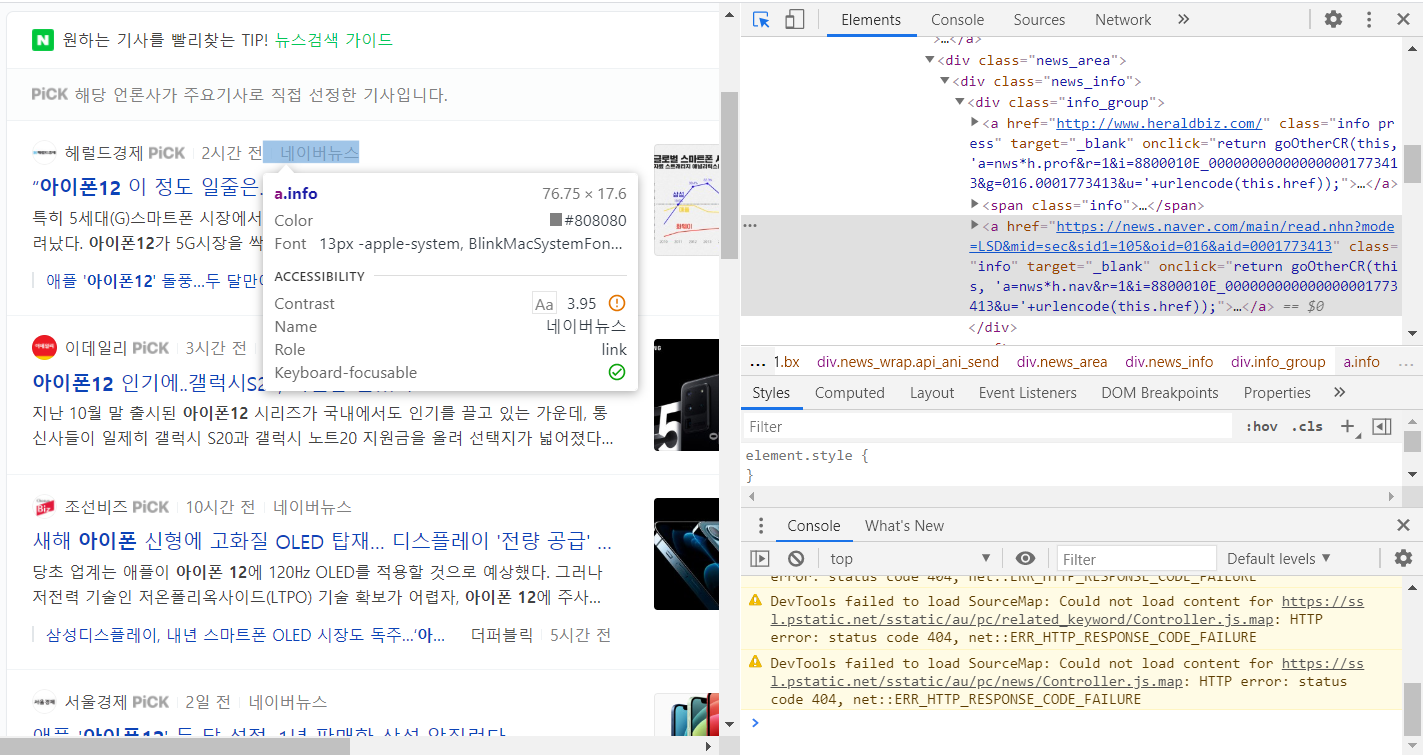

### 📰 삼성전자 뉴스 제목 가져오기

In [ ]:
import requests
from bs4 import BeautifulSoup

# 다음에서 삼성전자 뉴스 검색
url = 'https://search.daum.net/search?w=news&q=삼성전자'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')


In [ ]:
# CSS Selector로 뉴스 제목 찾기
title_tags = soup.select('strong.tit-g a')
print(f"총 {len(title_tags)}개 뉴스 제목 발견")


총 10개 뉴스 제목 발견


In [ ]:
# 각 뉴스 제목과 링크 출력
for i, tag in enumerate(title_tags):
    title = tag.text.strip()          # 제목 텍스트 (공백 제거)
    link = tag.get('href').strip()    # 링크 URL
    print(f"{i + 1}. {title}")
    print(f"   링크: {link}")
    print("=" * 60)

1. "트럼프 어쩌나" 발 동동…삼성전자 또 '악재' 한숨 터졌다 [반도체 포커스]
   링크: http://v.daum.net/v/20250823124437380
2. '이재용 아니면 안돼'…머스크가 삼성에 22조 베팅한 이유 [강해령의 테크앤더시티]
   링크: http://v.daum.net/v/20250823115115890
3. 美 정부, 삼성전자 주주 되나..."트럼프, 인텔 이어 삼성에도 지분 요구"
   링크: http://v.daum.net/v/20250823090842033
4. “8조 쏟아부은 AP 비용”…삼성전자, 엑시노스 복귀로 원가 절감 나서나
   링크: http://v.daum.net/v/20250823060237807
5. ‘인텔 최대주주’ 된 美정부 “이런 거래 더 할 것”…삼성 겨냥? [뉴스+]
   링크: http://v.daum.net/v/20250823150323615
6. 키움證 "삼성전자, HBM 출하량 급증·3분기 어닝서프…목표가 9만원"
   링크: http://v.daum.net/v/20250822082227755
7. 삼성전자 방문한 빌 게이츠 이사장
   링크: http://v.daum.net/v/20250822154215651
8. 美정부, 인텔 최대 주주 됐다…"지분 10% 소유"
   링크: http://v.daum.net/v/20250823170315828
9. 원신, 스타레일과 어깨 나란히 한 '몬길: 스타다이브'
   링크: http://v.daum.net/v/20250823163225478
10. 평택시, ‘기회의 땅’ 천지개벽…‘미래도시’ 쾌속질주 [핫이슈]
   링크: http://v.daum.net/v/20250823163130467


### 📋 연관검색어 가져오기

In [1]:
# 연관검색어 태그 찾기
keywords = soup.select('a.keyword')  # class="keyword"인 a 태그들 선택
print(f"발견된 연관검색어 개수: {len(keywords)}")

# 각 연관검색어 출력
for i, keyword in enumerate(keywords, 0):
    print(f"{i + 1}. {keyword.text}")  # 각 a 태그의 텍스트 내용 (연관검색어)
    if i == 9:
      break


NameError: name 'soup' is not defined

### 📊 데이터 구조화하여 저장

In [ ]:
# 뉴스 데이터를 딕셔너리 리스트로 저장
news_list = []

for title_tag in title_tags:
    # 각 뉴스를 딕셔너리로 구조화
    news_dict = {
        'title': title_tag.text.strip(),
        'url': title_tag.get('href')
    }
    news_list.append(news_dict)

# 결과 확인
print(f"수집된 뉴스 개수: {len(news_list)}")
news_list


수집된 뉴스 개수: 10


[{'title': '"트럼프 어쩌나" 발 동동…삼성전자 또 \'악재\' 한숨 터졌다 [반도체 포커스]',
  'url': 'http://v.daum.net/v/20250823124437380'},
 {'title': "'이재용 아니면 안돼'…머스크가 삼성에 22조 베팅한 이유 [강해령의 테크앤더시티]",
  'url': 'http://v.daum.net/v/20250823115115890'},
 {'title': '美 정부, 삼성전자 주주 되나..."트럼프, 인텔 이어 삼성에도 지분 요구"',
  'url': 'http://v.daum.net/v/20250823090842033'},
 {'title': '“8조 쏟아부은 AP 비용”…삼성전자, 엑시노스 복귀로 원가 절감 나서나',
  'url': 'http://v.daum.net/v/20250823060237807'},
 {'title': '‘인텔 최대주주’ 된 美정부 “이런 거래 더 할 것”…삼성 겨냥? [뉴스+]',
  'url': 'http://v.daum.net/v/20250823150323615'},
 {'title': '키움證 "삼성전자, HBM 출하량 급증·3분기 어닝서프…목표가 9만원"',
  'url': 'http://v.daum.net/v/20250822082227755'},
 {'title': '삼성전자 방문한 빌 게이츠 이사장',
  'url': 'http://v.daum.net/v/20250822154215651'},
 {'title': '美정부, 인텔 최대 주주 됐다…"지분 10% 소유"',
  'url': 'http://v.daum.net/v/20250823170315828'},
 {'title': "원신, 스타레일과 어깨 나란히 한 '몬길: 스타다이브'",
  'url': 'http://v.daum.net/v/20250823163225478'},
 {'title': '평택시, ‘기회의 땅’ 천지개벽…‘미래도시’ 쾌속질주 [핫이슈]',
  'url': 'http://v.daum.ne

## 💾 CSV 파일로 저장하기

### 📈 pandas DataFrame 활용

#### 기본 사용법

In [ ]:
import pandas as pd

In [ ]:
test_list = [
    {'title': '삼성전자 실적 발표', 'date': '2024-01-10'},
    {'title': '삼성전자 신제품 출시', 'date': '2024-01-09'}

]

# 딕셔너리 리스트를 DataFrame으로 변환
df_news = pd.DataFrame(test_list)
df_news


,title,date
0,삼성전자 실적 발표,2024-01-10
1,삼성전자 신제품 출시,2024-01-09


In [ ]:
# CSV 파일로 저장
df_news.to_csv('테스트.csv', encoding='utf-8-sig', index=False)


In [ ]:
# CSV파일 불러와서 DataFrame으로 읽기
df_loaded = pd.read_csv('테스트.csv', encoding='utf-8-sig')
df_loaded


,title,date
0,삼성전자 실적 발표,2024-01-10
1,삼성전자 신제품 출시,2024-01-09


#### 크롤링 활용

In [ ]:
# 딕셔너리 리스트를 DataFrame으로 변환
df_news = pd.DataFrame(news_list)
df_news.shape # (행, 열) 크기 확인


(30, 5)

In [ ]:
df_news.head() # DataFrame의 데이터의 상위 5개 행 확인


,page,order,keyword,title,url
0,1,1,일론머스크,일론 머스크의 ‘한국 기업 사랑’...30조 선물 보따리,http://v.daum.net/v/20250803062747056
1,1,2,일론머스크,"'CEO로 남아줘' 美 테슬라, 일론 머스크에 40조 상당 신주 지급",http://v.daum.net/v/20250804213801217
2,1,3,일론머스크,[IT썰] 일론 머스크 vs 샘 알트먼… 내년 3월 본 재판서 맞붙는다,http://v.daum.net/v/20250814082126548
3,1,4,일론머스크,"박명수, 일론 머스크에 불만 폭주..""로봇 말고 탈모 약이나 만들지""[스타이슈]",http://v.daum.net/v/20250815192637303
4,1,5,일론머스크,"‘25년 탈모’ 박명수 “일론 머스크 이해 안돼, 탈모약 만들었으면”(할명수)",http://v.daum.net/v/20250817162540665


In [ ]:
# CSV 파일로 저장
df_news.to_csv('삼성전자_뉴스정보.csv', encoding='utf-8-sig', index=False)


In [ ]:
# CSV파일 불러와서 DataFrame으로 읽기
df_loaded = pd.read_csv('삼성전자_뉴스정보.csv', encoding='utf-8-sig')
df_loaded.head()  # DataFrame의 데이터의 상위 5개 행 확인


,page,order,keyword,title,url
0,1,1,일론머스크,일론 머스크의 ‘한국 기업 사랑’...30조 선물 보따리,http://v.daum.net/v/20250803062747056
1,1,2,일론머스크,"'CEO로 남아줘' 美 테슬라, 일론 머스크에 40조 상당 신주 지급",http://v.daum.net/v/20250804213801217
2,1,3,일론머스크,[IT썰] 일론 머스크 vs 샘 알트먼… 내년 3월 본 재판서 맞붙는다,http://v.daum.net/v/20250814082126548
3,1,4,일론머스크,"박명수, 일론 머스크에 불만 폭주..""로봇 말고 탈모 약이나 만들지""[스타이슈]",http://v.daum.net/v/20250815192637303
4,1,5,일론머스크,"‘25년 탈모’ 박명수 “일론 머스크 이해 안돼, 탈모약 만들었으면”(할명수)",http://v.daum.net/v/20250817162540665


In [ ]:
df_loaded.tail()  # DataFrame의 데이터의 하위 5개 행 확인


,page,order,keyword,title,url
25,3,6,일론머스크,[신문과 놀자!/피플 in 뉴스]일론 머스크의 ‘화성 이주’… 무한 도전? 무모한 도전?,http://v.daum.net/v/20250811231137250
26,3,7,일론머스크,"[특징주]삼성전자, 일론 머스크 ""李회장과 파트너십 내용 논의""…23조 수주 부각↑",http://v.daum.net/v/20250730144842470
27,3,8,일론머스크,"""머스크, 저커버그에 오픈AI 인수 참여 타진""…법원 제출 문서 공개",http://v.daum.net/v/20250822182101205
28,3,9,일론머스크,"""머스크, 오픈AI 인수 위해 '앙숙' 저커버그에 지원 요청""",http://v.daum.net/v/20250822173218709
29,3,10,일론머스크,‘일론 머스크 칩’ 이식한 전신마비 여성…새로운 능력 생겼다,http://v.daum.net/v/20250730183600780


## 🔄 여러 페이지 크롤링

### 📋 뉴스 다중 페이지 수집

In [ ]:
import time

def crawl_news_list(keyword, max_pages=10):
    """뉴스 전체 페이지 크롤링"""
    all_news = []

    for page in range(1, max_pages + 1):
        print(f"🔍 {page}페이지 크롤링 중...")

        # 페이지별 URL 생성
        url = f'https://search.daum.net/search?w=news&q={keyword}&p={page}'

        # 웹 페이지 요청
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'lxml')

        # 뉴스 제목 태그 찾기
        title_tags = soup.select('strong.tit-g a')

        # 각 뉴스 정보 추출
        for j, tag in enumerate(title_tags, 1):
            news_item = {
                'page': page,
                'order': j,
                'keyword': keyword,
                'title': tag.text.strip(),
                'url': tag.get('href')
            }
            all_news.append(news_item)
            print(f"  {j}. {tag.text.strip()[:50]}...")

        print(f"✅ {page}페이지 완료: {len(title_tags)}개 뉴스")
        print("=" * 60)

        # 서버 부하 방지를 위한 대기
        time.sleep(1)

    return all_news


In [ ]:
# 실행
all_news_list = crawl_news_list("일론머스크", max_pages=3)
print(f"\n📊 총 수집된 뉴스: {len(all_news_list)}개")


🔍 1페이지 크롤링 중...
  1. 일론 머스크의 ‘한국 기업 사랑’...30조 선물 보따리...
  2. 'CEO로 남아줘' 美 테슬라, 일론 머스크에 40조 상당 신주 지급...
  3. [IT썰] 일론 머스크 vs 샘 알트먼… 내년 3월 본 재판서 맞붙는다...
  4. 박명수, 일론 머스크에 불만 폭주.."로봇 말고 탈모 약이나 만들지"[스타이슈]...
  5. ‘25년 탈모’ 박명수 “일론 머스크 이해 안돼, 탈모약 만들었으면”(할명수)...
  6. 일론 머스크 xAI, ‘그록 이메진’ 정식 출시…성인용 기능도 추가...
  7. “애플, 정치질 하는 거냐”...‘그록 차별’이라며 열받은 일론 머스크...
  8. 일론 머스크 VS 샘 알트먼…애플 앱스토어 'AI 1위' 놓고 정면충돌...
  9. [단독]한투파, 일론 머스크의 ‘스페이스X’에 140억 투자...
  10. 일론 머스크와 xAI 공동 창업한 이고르 바부슈킨도 퇴사...
✅ 1페이지 완료: 10개 뉴스
🔍 2페이지 크롤링 중...
  1. 샘 올트먼 vs 일론 머스크…법정과 X에서 이어지는 ‘AI 악연’...
  2. 박명수 "일론 머스크 뭐 하나, '이것' 안 만들고" 호통…탈모에 가장 좋은 방법은? [데...
  3. "테슬라로 번 돈 쏟아붓는다"…일론 머스크가 꽂힌 곳 어디...
  4. 일론 머스크 "이재용과 화상통화…파트너십 논의"...
  5. 'AI 악연' 일론 머스크 vs 샘 올트먼 법정에서 만난다 [프레스룸 LIVE]...
  6. “내슈빌은 터널 만들기 어려운 곳”… 그래도 하겠다는 일론 머스크...
  7. 샘 올트먼 vs 일론 머스크 이번엔 '뇌과학' 기술전쟁...
  8. 일론 머스크 "삼성, 165억달러 최소액"…거래 확대 시사...
  9. "삼성전자 훌륭한 기업" 삼성 파운드리 기술 옹호한 일론 머스크...
  10. 일론머스크 "삼성과 차세대 테슬라칩 'AI6' 계약…텍사스 공장서 생산"...
✅ 2페이지 완료: 10개 뉴스
🔍 3페이지 크롤링 중...

In [ ]:
# 전체 뉴스
all_news_list[:3]

[{'page': 1,
  'order': 1,
  'keyword': '일론머스크',
  'title': '일론 머스크의 ‘한국 기업 사랑’...30조 선물 보따리',
  'url': 'http://v.daum.net/v/20250803062747056'},
 {'page': 1,
  'order': 2,
  'keyword': '일론머스크',
  'title': "'CEO로 남아줘' 美 테슬라, 일론 머스크에 40조 상당 신주 지급",
  'url': 'http://v.daum.net/v/20250804213801217'},
 {'page': 1,
  'order': 3,
  'keyword': '일론머스크',
  'title': '[IT썰] 일론 머스크 vs 샘 알트먼… 내년 3월 본 재판서 맞붙는다',
  'url': 'http://v.daum.net/v/20250814082126548'}]

In [ ]:
# all_news_list데이터를 CSV파일로 저장하고 확인해보세요

# 여기에 작성

In [ ]:
# @title [완성코드] CSV파일 저장 및 로드

df_news_all = pd.DataFrame(all_news_list)

# CSV 파일로 저장
csv_filename = '일론머스크_뉴스_다중페이지.csv'
df_news_all.to_csv(csv_filename, encoding='utf-8-sig', index=False)


# CSV 파일 다시 불러와서 DataFrame으로 읽기
df_loaded_all = pd.read_csv(csv_filename, encoding='utf-8-sig')
df_loaded_all.head()  # 상위 5행 확인


,page,order,keyword,title,url
0,1,1,일론머스크,일론 머스크의 ‘한국 기업 사랑’...30조 선물 보따리,http://v.daum.net/v/20250803062747056
1,1,2,일론머스크,"'CEO로 남아줘' 美 테슬라, 일론 머스크에 40조 상당 신주 지급",http://v.daum.net/v/20250804213801217
2,1,3,일론머스크,[IT썰] 일론 머스크 vs 샘 알트먼… 내년 3월 본 재판서 맞붙는다,http://v.daum.net/v/20250814082126548
3,1,4,일론머스크,"박명수, 일론 머스크에 불만 폭주..""로봇 말고 탈모 약이나 만들지""[스타이슈]",http://v.daum.net/v/20250815192637303
4,1,5,일론머스크,"‘25년 탈모’ 박명수 “일론 머스크 이해 안돼, 탈모약 만들었으면”(할명수)",http://v.daum.net/v/20250817162540665


# 🎵 멜론 차트 TOP 100 크롤링

## 예제코드

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

def crawl_melon_chart():
    """멜론 차트 TOP 100 크롤링 함수"""

    # 멜론 차트 URL
    url = 'https://www.melon.com/chart/index.htm'

    # 브라우저 헤더 설정 (멜론은 User-Agent 체크함)
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
    }

    try:
        # 웹 페이지 요청
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # HTTP 오류 체크

        # BeautifulSoup으로 HTML 파싱
        soup = BeautifulSoup(response.content, 'lxml')

        # 차트 데이터 수집
        chart_data = []

        # 멜론 차트의 각 곡 정보를 담고 있는 tr 태그 선택
        song_rows = soup.select('tbody tr')

        for row in song_rows:
            try:
                # 노래 ID추출
                id = row.get("data-song-no")

                # 순위 추출
                rank_tag = row.select_one('.rank')
                rank = rank_tag.text.strip()

                # 곡명 추출
                title_tag = row.select_one('.ellipsis.rank01 a')
                title = title_tag.text.strip() if title_tag else "정보 없음"

                # 아티스트 추출
                artist_tags = row.select(".ellipsis.rank02 > a")
                if artist_tags:
                    # 여러 아티스트가 있을 경우 쉼표로 연결
                    artists = [tag.text.strip() for tag in artist_tags]
                    artist = ", ".join(artists)
                else:
                    artist = "정보 없음"

                # 앨범명 추출
                album_tag = row.select_one('.ellipsis.rank03 a')
                album = album_tag.text.strip() if album_tag else "정보 없음"

                # 데이터 저장
                song_info = {
                    "id": int(id) if id.isdigit() else 0,
                    "rank": int(rank) if rank.isdigit() else 0,
                    "title": title,
                    "artist": artist,
                    "album": album,
                }

                chart_data.append(song_info)
                print(f"{rank}위: {title} - {album})")

            except Exception as e:
                print(f"곡 정보 추출 중 오류: {e}")
                continue

        return chart_data

    except requests.exceptions.RequestException as e:
        print(f"웹 페이지 요청 실패: {e}")
        return []
    except Exception as e:
        print(f"크롤링 중 오류 발생: {e}")
        return []

def save_to_json(data, filename='melon_chart_top100.json'):
    """크롤링한 데이터를 JSON 파일로 저장"""
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=2)
        print(f"✅ JSON 파일 저장 완료: {filename}")
    except Exception as e:
        print(f"❌ JSON 파일 저장 실패: {e}")

In [ ]:
 # 멜론 차트 크롤링
melon_data = crawl_melon_chart()

1위: Golden - KPop Demon Hunters (Soundtrack from the Netflix Film))
2위: Soda Pop - KPop Demon Hunters (Soundtrack from the Netflix Film))
3위: 뛰어(JUMP) - 뛰어(JUMP))
4위: FAMOUS - FAMOUS)
5위: Drowning - OO-LI)
6위: 시작의 아이 - 시작의 아이 ハジマリのコ (Starting With You))
7위: 시작의 아이 ❍ - 시작의 아이 ❍ ハジマリのコ Starting With You : ♡)
8위: Dirty Work - Dirty Work)
9위: Your Idol - KPop Demon Hunters (Soundtrack from the Netflix Film))
10위: 너에게 닿기를 - 너에게 닿기를)
11위: WICKED - FAMOUS)
12위: 어제보다 슬픈 오늘 - 어제보다 슬픈 오늘)
13위: 모르시나요(PROD.로코베리) - 모르시나요)
14위: Whiplash - Whiplash - The 5th Mini Album)
15위: How It’s Done - KPop Demon Hunters (Soundtrack from the Netflix Film))
16위: HOME SWEET HOME (feat. 태양, 대성) - HOME SWEET HOME (feat. 태양, 대성))
17위: like JENNIE - Ruby)
18위: 청춘만화 - 만화 (滿花))
19위: Never Ending Story - 꽃갈피 셋)
20위: 운명 (2025) - 먼키의 발자국 Vol.1 With 이이경)
21위: APT. - APT.)
22위: 나는 반딧불 - 나는 반딧불)
23위: 빌려온 고양이 (Do the Dance) - bomb)
24위: 사랑은 늘 도망가 - 신사와 아가씨 OST Part.2)
25위: STYLE - STYLE)
26위: TOO BAD (feat. Anderson .Paak) - Ü

In [ ]:
melon_data[:5]

[{'id': 39166708,
  'rank': 1,
  'title': 'Golden',
  'artist': 'HUNTR/X, EJAE, AUDREY NUNA, REI AMI, KPop Demon Hunters Cast',
  'album': 'KPop Demon Hunters (Soundtrack from the Netflix Film)'},
 {'id': 39166705,
  'rank': 2,
  'title': 'Soda Pop',
  'artist': 'KPop Demon Hunters Cast, Danny Chung, Saja Boys, Andrew Choi, Neckwav, Kevin Woo, samUIL Lee',
  'album': 'KPop Demon Hunters (Soundtrack from the Netflix Film)'},
 {'id': 39298775,
  'rank': 3,
  'title': '뛰어(JUMP)',
  'artist': 'BLACKPINK',
  'album': '뛰어(JUMP)'},
 {'id': 39156202,
  'rank': 4,
  'title': 'FAMOUS',
  'artist': 'ALLDAY PROJECT',
  'album': 'FAMOUS'},
 {'id': 36397952,
  'rank': 5,
  'title': 'Drowning',
  'artist': 'WOODZ',
  'album': 'OO-LI'}]

In [ ]:
# JSON 파일로 저장
save_to_json(melon_data)

✅ JSON 파일 저장 완료: melon_chart_top100.json


## 📋 생성되는 JSON 파일 구조

```json
[
  {
    "rank": 1,
    "title": "곡명",
    "album": "앨범명",
  },
  {
    "rank": 2,
    "title": "곡명",
    "album": "앨범명",
  }
]

```